# This notebook gives an introduction to the xcube's "zenodo" data store

This notebook shows an example how to access a TIF and a NetCDF published on the [https://zenodo.org](https://zenodo.org) webpage. 

### Setup
In order to run this notebook you need to get an access token for the Zenodo API following the [documentation](https://zenodo.org/login/?next=%2Faccount%2Fsettings%2Fapplications%2Ftokens%2Fnew%2F). Furthermore, make sure that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is installed. You may install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) directly from the git repository by cloning the repository, directing into `xcube-zenodo`, and following the steps below:

```bash
conda env create -f environment.yml
conda activate xcube-zenodo
pip install .
```

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [2]:
%%time
from xcube.core.store import new_data_store
from xcube.core.store import get_data_store_params_schema
import itertools

CPU times: user 7 μs, sys: 1 μs, total: 8 μs
Wall time: 10 μs


First, we get the store parameters needed to initialize a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [3]:
%%time
store_params = get_data_store_params_schema("zenodo")
store_params

CPU times: user 33.4 ms, sys: 8.93 ms, total: 42.3 ms
Wall time: 41.6 ms


We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) with the access_token. Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function.

In [4]:
%%time
access_token = "XVYlYi840itHkdbVXN2PtQk9cBeIY2WQ9OlVQeIssaP9YgMDAAyjlnIc6H6l"
store = new_data_store("zenodo", access_token=access_token)

CPU times: user 5.17 ms, sys: 15 μs, total: 5.18 ms
Wall time: 5.1 ms


The data IDs are set to `"<record_id>/<file_name>"`. For example for the [Canopy height and biomass map for Europe](https://zenodo.org/records/8154445) the data ID for the dataset "planet_canopy_cover_30m_v0.1.tif" will be given by `"8154445/planet_canopy_cover_30m_v0.1.tif"`. The record ID can be found in the url of the zenodo page. The data IDs of the available datasets published on https://zenodo.org can be streamed using the `get_data_ids` method. Note that records published on zenodo often contain no files or just pdfs which will be skipped by the zenodo data store. Therefore, the streaming of the data IDs can take some time.   

In [5]:
%%time
data_ids = store.get_data_ids()
list(itertools.islice(data_ids, 10))

CPU times: user 43.9 ms, sys: 5.57 ms, total: 49.4 ms
Wall time: 25.5 s


['14446470/pretrained.zip',
 '14446770/mastodon-sc/mastodon-deep-lineage-mastodon-deep-lineage-0.4.3.zip',
 '14446677/MeTech/haptic-oriring-public-v1.1.zip',
 '14446628/magicrjk/treeofrobots-ToR-V1.0.zip',
 '14446620/Ahmet-Agaoglu/The-Corridor-Method-0.1.0.zip',
 '14446612/FAIRmat-NFDI/pynxtools-xps-v0.4.9.zip',
 '14446605/PowerGridModel/power-grid-model-v1.10.22.zip',
 '14446598/FerdinandKlingenberg/tree-cover-density-comparison-V1.0.0.zip',
 '14446582/KatieWillis/DriveSelectionBalance-DriveSelectionBalance.zip',
 '14441477/simulation_data.zip']

After selection of a specific dataset, we can describe the dataset using the `describe_data` method.  

In the next step, we can open the data for each data ID. The following code shows which parameters are available for opening the data.

In [6]:
store.describe_data("8154445/planet_canopy_cover_30m_v0.1.tif")

Next we can open the data. We can first view the available opening parameters, which can be added to the `open_data` method in the subsequent cell. 

In [7]:
%%time
open_params = store.get_open_data_params_schema(data_id="8154445/planet_canopy_cover_30m_v0.1.tif")
open_params

CPU times: user 217 μs, sys: 20 μs, total: 237 μs
Wall time: 239 μs


In [8]:
%%time
ds = store.open_data(
    "8154445/planet_canopy_cover_30m_v0.1.tif",
    tile_size=(1024, 1024)
)
ds

CPU times: user 21.2 ms, sys: 4.01 ms, total: 25.2 ms
Wall time: 24.1 ms


<xarray.Dataset> Size: 25GB
Dimensions:      (x: 170397, y: 149363)
Coordinates:
  * x            (x) float64 1MB 2.555e+06 2.555e+06 ... 7.667e+06 7.667e+06
  * y            (y) float64 1MB 5.82e+06 5.82e+06 ... 1.339e+06 1.339e+06
    spatial_ref  int64 8B 0
Data variables:
    band_1       (y, x) uint8 25GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    source:   https://zenodo.org/records/8154445/files/planet_canopy_cover_30...

We plot parts of the opened data as an example below. The data shows the canopy cover fraction within a range of [0, 100]. 

CPU times: user 661 ms, sys: 122 ms, total: 783 ms
Wall time: 4 s


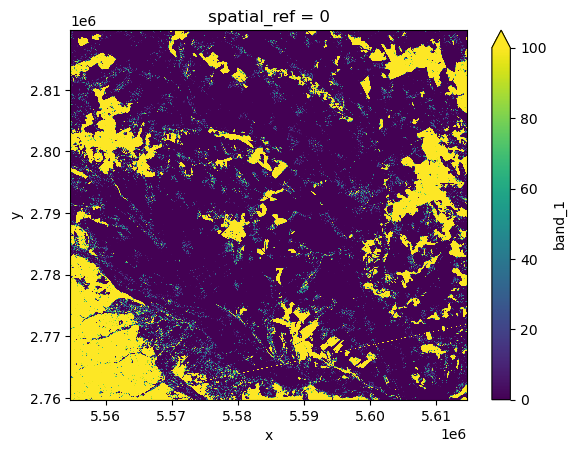

In [9]:
%%time
ds.band_1[100000:102000, 100000:102000].plot(vmin=0, vmax=100)

We can also open a TIFF as a [xcube's multi-resolution  dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html#xcube-multi-resolution-datasets), where we can select the level of resolution. The opened dataset however is not cloud optimized and thus consists of only one level.   

In [10]:
%%time
mlds = store.open_data(
    "8154445/planet_canopy_cover_30m_v0.1.tif",
    tile_size=(1024, 1024),
    data_type="mldataset"
)
mlds.num_levels

CPU times: user 5.73 ms, sys: 1.12 ms, total: 6.85 ms
Wall time: 161 ms


1

In [11]:
ds = mlds.get_dataset(0)
ds

<xarray.Dataset> Size: 25GB
Dimensions:      (x: 170397, y: 149363)
Coordinates:
  * x            (x) float64 1MB 2.555e+06 2.555e+06 ... 7.667e+06 7.667e+06
  * y            (y) float64 1MB 5.82e+06 5.82e+06 ... 1.339e+06 1.339e+06
    spatial_ref  int64 8B 0
Data variables:
    band_1       (y, x) uint8 25GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    source:   https://zenodo.org/records/8154445/files/planet_canopy_cover_30...

---

We can also use the zenodo data store to open NetCDF files as shown in the following cells. Note if `chunks` are given, the data set is loaded lazily as a [chunked xr.Dataset](https://xarray.pydata.org/en/v0.10.2/dask.html).

In [12]:
%%time
ds = store.open_data(
    "13882297/gridded_tidestats_ERA5weather.nc",
    chunks={}
)
ds

CPU times: user 65.9 ms, sys: 21.8 ms, total: 87.7 ms
Wall time: 8.05 s


<xarray.Dataset> Size: 15MB
Dimensions:  (y: 375, x: 297)
Dimensions without coordinates: y, x
Data variables: (12/17)
    nav_lon  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    nav_lat  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    z0       (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    HAT      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    LAT      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MHW      (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    ...       ...
    MHHW     (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MLLW     (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    RangeAT  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MSRange  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MRange   (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
    MNRange  (y, x) float64 891kB dask.array<chunksize=(375, 297), meta=np.ndarray>
Attributes:
    Author:       Joanne Williams, joll@noc.ac.uk
    Institute:    National Oceanography Centre
    Title:        Tidal constituents for NOCtide from model run
    Modelrun:     ERA5weather
    Modelconfig:  newfriction
    TimeStamp:    11-Jun-2024 13:01:44
    Notes:        Statistics based on ERA5 hindcast run from 1980 to 2022. \n...

We plot the Mean Low Water (MLW) data as an example. 

CPU times: user 29.5 ms, sys: 7.4 ms, total: 36.9 ms
Wall time: 527 ms


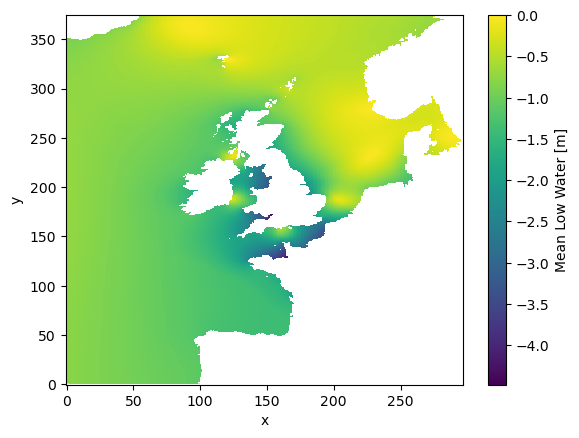

In [13]:
%%time
ds.MLW.plot()